In [1]:
# 基础库导入，注意第一次运行时会比较慢，要做数据的解压等处理操作
from __future__ import print_function
from __future__ import division

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
# 使用insert 0即只使用github，避免交叉使用了pip安装的abupy，导致的版本不一致问题
sys.path.insert(0, os.path.abspath('../'))


In [2]:
import abupy
from abupy import abu, EMarketTargetType, AbuMetricsBase, ABuMarketDrawing, ABuProgress, ABuSymbolPd
abupy.env.g_market_target = EMarketTargetType.E_MARKET_TARGET_US

In [3]:
# 使用沙盒数据，目的是和书中一样的数据环境
abupy.env.enable_example_env_ipython()

enable example env will only read RomDataBu/csv


In [4]:
abupy.env.g_market_target

<EMarketTargetType.E_MARKET_TARGET_US: 'us'>

Box(children=(Text(value='pid=437304 begin work'), FloatProgress(value=0.0)))

FloatProgress(value=0.0)

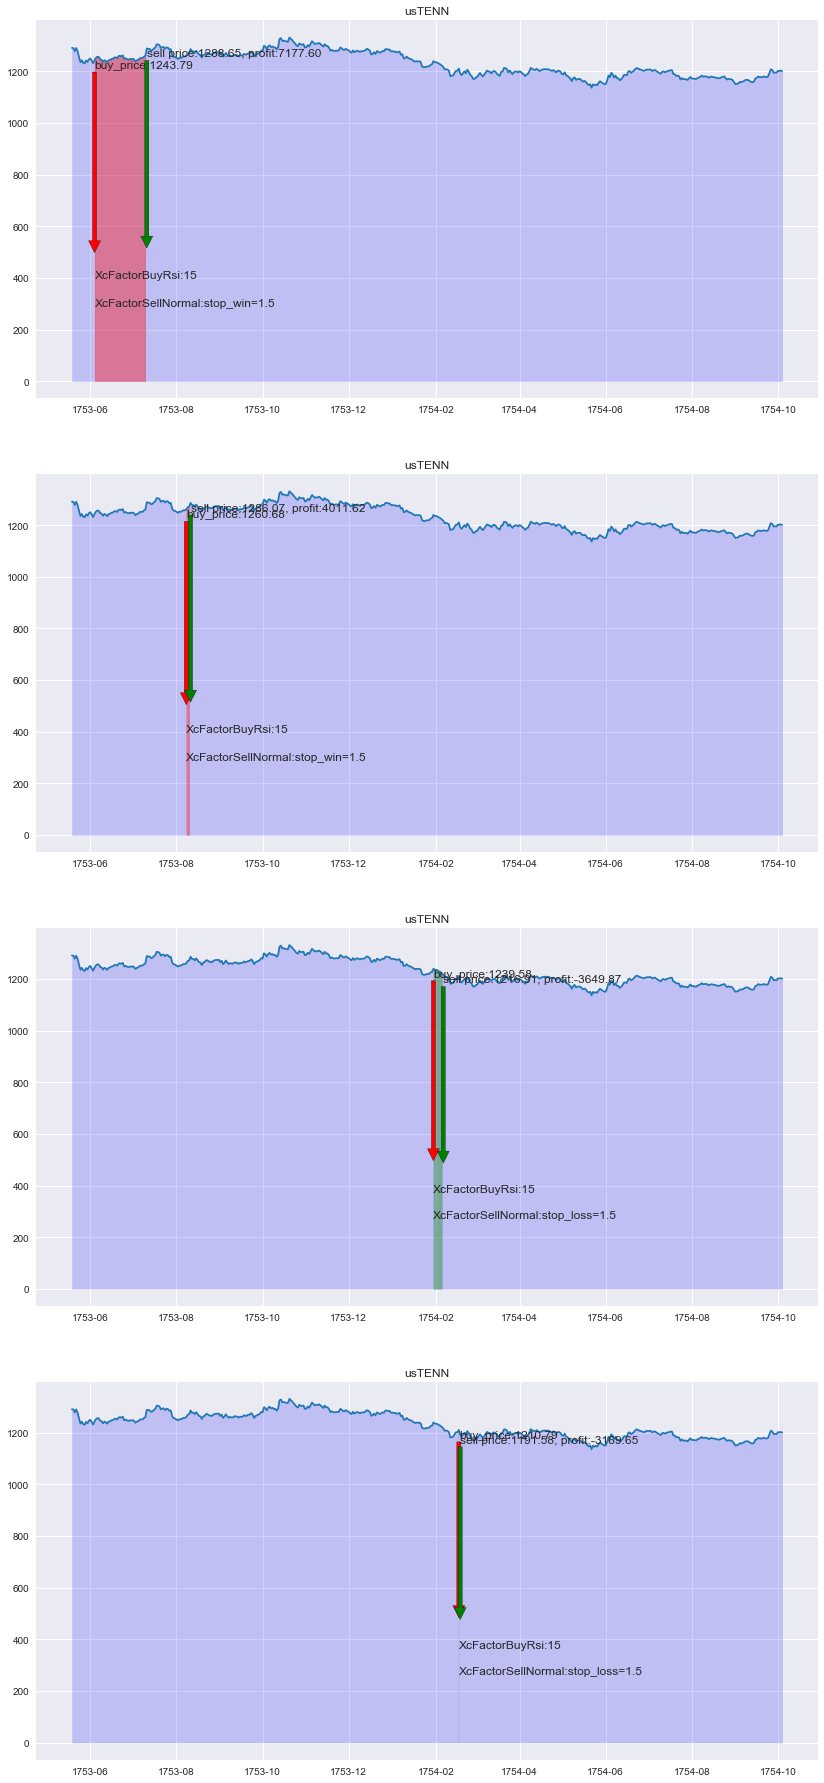

Wall time: 2.65 s


In [5]:
%%time
#看具体数据
from abupy import AbuBenchmark
from abupy import AbuCapital
from abupy import ABuPickTimeExecute
from abupy import AbuFactorBuyBreak, AbuFactorSellBreak
from abupy import XcFactorBuyRsi
from abupy import AbuFactorAtrNStop
from abupy import AbuFactorPreAtrNStop
from abupy import AbuFactorCloseAtrNStop
from abupy import XcFactorSellNormal

# buy_factors 60日向上突破，42日向上突破两个因子
#{'rsi': 15, 'class': XcFactorBuyRsi}
buy_factors = [{'rsi': 15, 'class': XcFactorBuyRsi}
            ]
sell_factors = [{'stop_loss_n': 1.5, 'stop_win_n':1.5,'class': XcFactorSellNormal},]

choice_symbols = ['usTENN']
benchmark = AbuBenchmark()
capital = AbuCapital(1000000, benchmark)
orders_pd, action_pd, all_fit_symbols_cnt= ABuPickTimeExecute.do_symbols_with_same_factors(choice_symbols,
                                                                            benchmark,
                                                                            buy_factors,
                                                                            sell_factors,
                                                                            capital, show=True)

In [13]:
#订单
orders_pd

,buy_date,buy_price,buy_cnt,buy_factor,symbol,buy_pos,buy_type_str,expect_direction,sell_type_extra,sell_date,sell_price,sell_type,ml_features,key,profit,result,profit_cg,profit_cg_hunder,keep_days
2014-10-29,20141029,21.62,6095.0,AbuFactorBuyBreak:42,usTENN,AbuAtrPosition,call,1.0,XcFactorSellNormal:stop_win=1.5,20141030,21.989,win,None,68,2249.05,1,0.0171,1.7067,1
2015-01-27,20150127,23.70,3667.0,AbuFactorBuyBreak:42,usTENN,AbuAtrPosition,call,1.0,XcFactorSellNormal:stop_loss=1.5,20150128,22.950,loss,None,128,-2750.25,-1,-0.0316,-3.1646,1
2015-04-01,20150401,29.31,4998.0,AbuFactorBuyBreak:42,usTENN,AbuAtrPosition,call,1.0,XcFactorSellNormal:stop_loss=1.5,20150407,28.520,loss,None,173,-3948.42,-1,-0.0270,-2.6953,6
2015-10-28,20151028,20.73,5628.0,AbuFactorBuyBreak:42,usTENN,AbuAtrPosition,call,1.0,XcFactorSellNormal:stop_loss=1.5,20151029,20.350,loss,None,318,-2138.64,-1,-0.0183,-1.8331,1
2016-04-04,20160404,12.90,8396.0,AbuFactorBuyBreak:42,usTENN,AbuAtrPosition,call,1.0,XcFactorSellNormal:stop_win=1.5,20160411,13.380,win,None,425,4030.08,1,0.0372,3.7209,7
2016-07-12,20160712,12.74,10051.0,AbuFactorBuyBreak:42,usTENN,AbuAtrPosition,call,1.0,XcFactorSellNormal:stop_win=1.5,20160719,13.200,win,None,493,4623.46,1,0.0361,3.6107,7


In [12]:
#动作
action_pd

,Date,Price,Cnt,symbol,Direction,Price2,action,deal
0,20141029,21.620,6095.0,usTENN,1.0,21.989,buy,True
1,20141030,21.989,6095.0,usTENN,1.0,21.620,sell,True
2,20150127,23.700,3667.0,usTENN,1.0,22.950,buy,True
3,20150128,22.950,3667.0,usTENN,1.0,23.700,sell,True
4,20150401,29.310,4998.0,usTENN,1.0,28.520,buy,True
5,20150407,28.520,4998.0,usTENN,1.0,29.310,sell,True
6,20151028,20.730,5628.0,usTENN,1.0,20.350,buy,True
7,20151029,20.350,5628.0,usTENN,1.0,20.730,sell,True
8,20160404,12.900,8396.0,usTENN,1.0,13.380,buy,True
9,20160411,13.380,8396.0,usTENN,1.0,12.900,sell,True


买入后卖出的交易数量:6
买入后尚未卖出的交易数量:0
胜率:50.0000%
平均获利期望:3.0128%
平均亏损期望:-2.5643%
盈亏比:1.2337
策略收益: 0.1956%
基准收益: -35.8821%
策略年化收益: 0.0978%
基准年化收益: -17.9411%
策略买入成交比例:100.0000%
策略资金利用率比例:0.3892%
策略共执行504个交易日


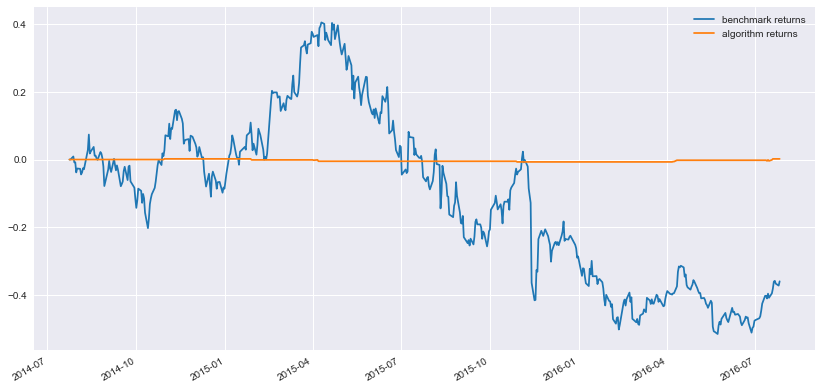

In [11]:
#简单度量
from abupy import AbuMetricsBase 
metrics = AbuMetricsBase(orders_pd, action_pd, capital, benchmark)
metrics.fit_metrics()
metrics.plot_returns_cmp(only_show_returns=True)

手续费

In [14]:
# 使用run_loop_back运行策略
from abupy import abu, ABuProgress
# 设置初始资金数
read_cash = 1000000
# 设置选股因子，None为不使用选股因子
stock_pickers = None
abu_result_tuple, kl_pd_manger = abu.run_loop_back(read_cash,
                                                   buy_factors,
                                                   sell_factors,
                                                   stock_pickers,
                                                   choice_symbols=choice_symbols,
                                                   n_folds=10000,
                                               )
ABuProgress.clear_output()

买入后卖出的交易数量:629
买入后尚未卖出的交易数量:0
胜率:51.6693%
平均获利期望:1.7974%
平均亏损期望:-1.7588%
盈亏比:1.0906
策略收益: 9.3372%
基准收益: -50.0071%
策略年化收益: 0.0353%
基准年化收益: -0.1890%
策略买入成交比例:100.0000%
策略资金利用率比例:7.8914%
策略共执行66667个交易日


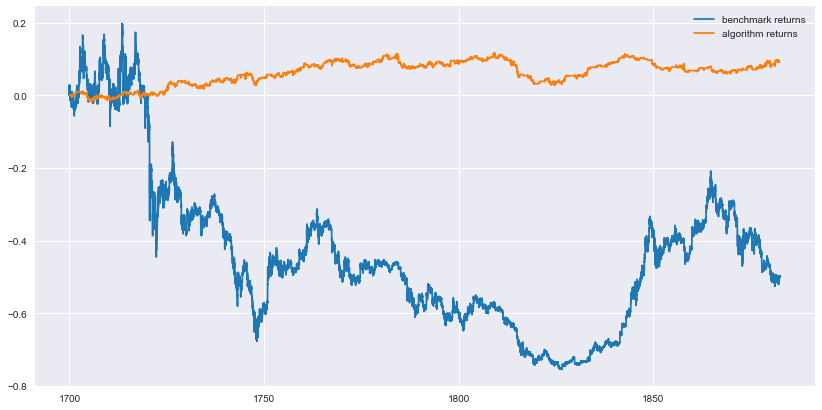

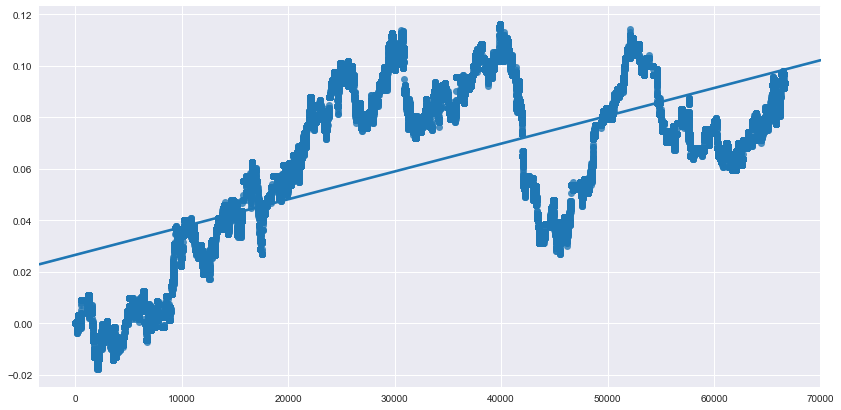

C:\Users\mill\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


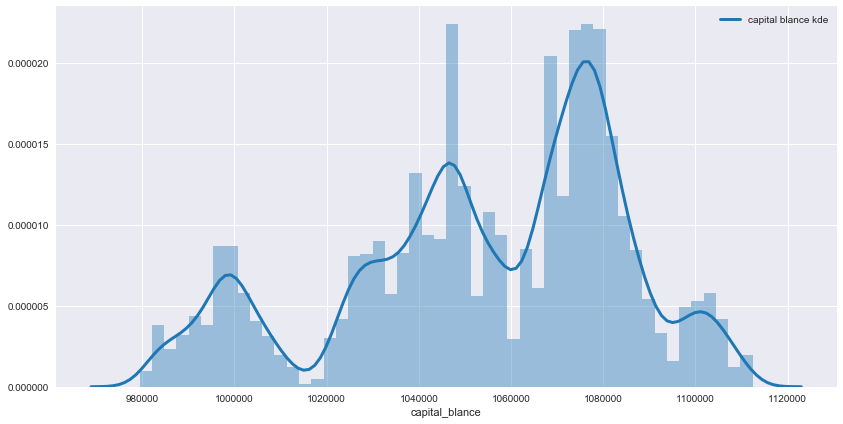

In [15]:
'''
输出的文字信息打印了胜率、获利期望、亏损期望、策略收益、买入成交比例等信息
第一图为策略收益与基准收益对照
第二图为策略收益线性拟合曲线
第三图为策略收益资金概率密度图
'''

from abupy import AbuMetricsBase
metrics = AbuMetricsBase(*abu_result_tuple)
metrics.fit_metrics()
metrics.plot_returns_cmp()

alpha阿尔法:-0.0610
beta贝塔:0.2353
Information信息比率:-0.0479
策略Sharpe夏普比率: -0.3710
基准Sharpe夏普比率: 0.5012
策略波动率Volatility: 0.1107
基准波动率Volatility: 0.1689


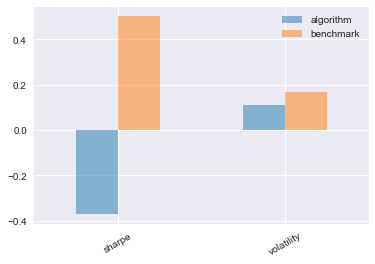

In [48]:
#如下代码通过plot_sharp_volatility_cmp()函数可视化策略与基准之间波动率和夏普比率关系
metrics.plot_sharp_volatility_cmp()

如下代码通过plot_effect_mean_day()函数可视化策略买入因子生效间隔天数， 统计买入因子的生效间隔，如图9-3所示。不同的类型的买入因子策略在生效周期上差别很大，组合不同特性的买入因子组成良好的买入策略很重要，但是要注意买入因子的组合不是组合的因子越多，优势越大，所有因子的组合、不光是优势的组合，同时也是劣势的组合。

因子平均生效间隔:58.0


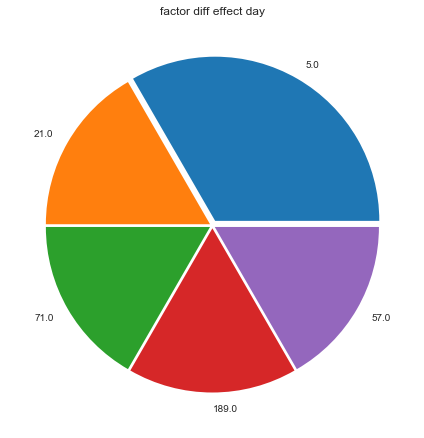

In [50]:
metrics.plot_effect_mean_day()

如下代码通过plot_keep_days()函数可视化策略持股天数：

策略持股天数平均数: 14.535
策略持股天数中位数: 8.000


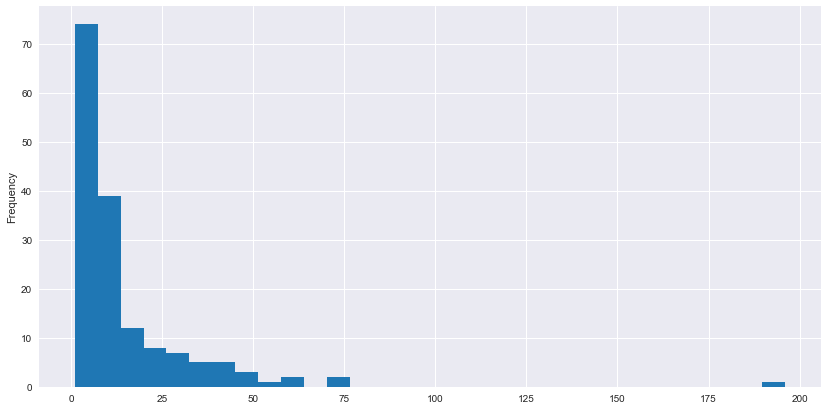

In [8]:
metrics.plot_keep_days()

如下代码通过plot_sell_factors()函数可视化策略卖出因子生效分布情况:

卖出择时生效因子分布：
XcFactorSellNormal:stop_loss=1.5    86
XcFactorSellNormal:stop_win=1.5     73
dtype: int64


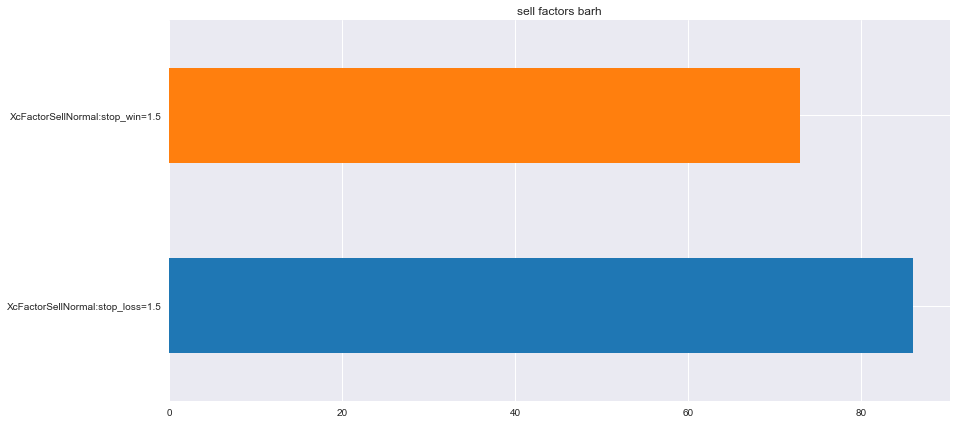

In [9]:
metrics.plot_sell_factors()

plot_max_draw_down()函数中实现了计算最大回撤并可视化:

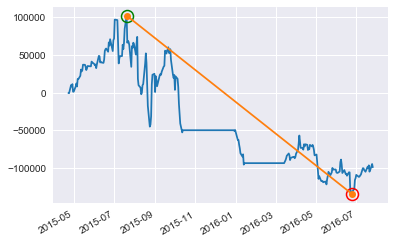

最大回撤: 0.214702
最大回测启始时间:2015-07-20, 结束时间2016-06-24, 共回测236678.835000


In [52]:
metrics.plot_max_draw_down()

Grid Search实际上是蒙特卡洛方法的一种实现子集，它首先固定了几组参数取值范围，把无限个解问题先缩小到有限个解的问题，然后对排列组合的各个参数组合迭代进行运算，得到最优结果。

既然是在给定参数范围内寻找最优，所以首先要给定一个合理的参数范围，下面首先寻找AbuFactorAtrNStop的参数组合如下所示：

In [11]:
from abupy import AbuFactorAtrNStop, AbuFactorPreAtrNStop, AbuFactorCloseAtrNStop, AbuFactorBuyBreak
from abupy import abu, ABuFileUtil, ABuGridHelper, GridSearch, AbuBlockProgress, ABuProgress

rsi = np.arange(15,100,5)


sell_atr_nstop_factor_grid = {
              'class': [XcFactorBuyRsi],
              'rsi'   : rsi
         }

sell_factors_product = ABuGridHelper.gen_factor_grid(
    ABuGridHelper.K_GEN_FACTOR_PARAMS_SELL,
    [sell_atr_nstop_factor_grid, sell_atr_pre_factor_grid, sell_atr_close_factor_grid], need_empty_sell=True)

print('卖出因子参数共有{}种组合方式'.format(len(sell_factors_product)))
print('卖出因子组合0: 形式为{}'.format(sell_factors_product[0]))

NameError: name 'sell_atr_pre_factor_grid' is not defined

下面代码使用abupy中的GridSearch类进行最优参数寻找，从GridSearch类参数可以看到除了buy_factors_product、sell_factors_product外，还有stock_pickers_product（选股因子排列组合）本例没有用到，读者可自行尝试。

In [ ]:
read_cash = 1000000
choice_symbols = ['usNOAH', 'usSFUN', 'usBIDU', 'usAAPL', 'usGOOG',
                  'usTSLA', 'usWUBA', 'usVIPS']
grid_search = GridSearch(read_cash, choice_symbols,
                         buy_factors_product=buy_factors_product,
                         sell_factors_product=sell_factors_product)

下面开始通过fit函数开始寻找最优，第一次运行select：run gird search，然后点击run select，如果已经运行过可select：load score cache直接从缓存数据读取

备注：如果第一次运行选择run gird search下面的运行耗时大约1小时多，建议电脑空闲时运行

In [ ]:
scores = None
score_tuple_array = None

def run_grid_search():
    global scores, score_tuple_array
    # 运行GridSearch n_jobs=-1启动cpu个数的进程数
    scores, score_tuple_array = grid_search.fit(n_jobs=-1)
    # 运行完成输出的score_tuple_array可以使用dump_pickle保存在本地，以方便之后使用
    ABuFileUtil.dump_pickle(score_tuple_array, '../gen/score_tuple_array')

def load_score_cache():
    """有本地数据score_tuple_array后，即可以从本地缓存读取score_tuple_array"""
    global scores, score_tuple_array
    
    with AbuBlockProgress('load score cache'):
        score_tuple_array = ABuFileUtil.load_pickle('../gen/score_tuple_array')
        if not hasattr(grid_search, 'best_score_tuple_grid'):
            # load_pickle的grid_search没有赋予best_score_tuple_grid，这里补上
            from abupy import make_scorer, WrsmScorer
            scores = make_scorer(score_tuple_array, WrsmScorer)
            grid_search.best_score_tuple_grid = score_tuple_array[scores.index[-1]]
        print('load complete!')
        
def select(select):
    if select == 'run gird search':
        run_grid_search()
    else: # load score cache
        load_score_cache()

_ = ipywidgets.interact_manual(select, select=['run gird search', 'load score cache'])

grid_search中保存了得到分数最高的对象best_score_tuple_grid，可以利用它直接用AbuMetricsBase可视化最优参数结果，如图

In [ ]:
from abupy import AbuMetricsBase
best_score_tuple_grid = grid_search.best_score_tuple_grid
AbuMetricsBase.show_general(best_score_tuple_grid.orders_pd, best_score_tuple_grid.action_pd,
                                        best_score_tuple_grid.capital, best_score_tuple_grid.benchmark)